# Predicting cuisine by provided ingredients

Goal is to use provided recipe ingredients to classify the cuisine.

## Part 1: Exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import string

Loading of whats-cooking dataset from Kaggle competition into a dataframe.

In [226]:
curr_path = os.path.dirname(os.getcwd())
data_path = os.path.join(curr_path, 'whats-cooking/data')
input_file = os.path.join(data_path, 'train.json')
test_file = os.path.join(data_path, 'test.json')

In [324]:
with open(input_file) as file:
    data = json.load(file)
    df = pd.DataFrame(data) 

with open(test_file) as file:
    data = json.load(file)
    df_test = pd.DataFrame(data) 

We will check out the first few rows of data:

In [4]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Each data sample consists of a cuisine label, an id and the ingredients of the recipe.

In [5]:
df.info()
n_cuisines = len(df['cuisine'].unique())
print(n_cuisines)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB
20


In the dataset we have <font color='#2ecc71'><b>39774</b></font> data samples and <font color='#2ecc71'><b>20</b></font> unique cuisines as labels.

In [6]:
cuisine_counts = dict(df['cuisine'].value_counts())
print(cuisine_counts)

{'italian': 7838, 'mexican': 6438, 'southern_us': 4320, 'indian': 3003, 'chinese': 2673, 'french': 2646, 'cajun_creole': 1546, 'thai': 1539, 'japanese': 1423, 'greek': 1175, 'spanish': 989, 'korean': 830, 'vietnamese': 825, 'moroccan': 821, 'british': 804, 'filipino': 755, 'irish': 667, 'jamaican': 526, 'russian': 489, 'brazilian': 467}


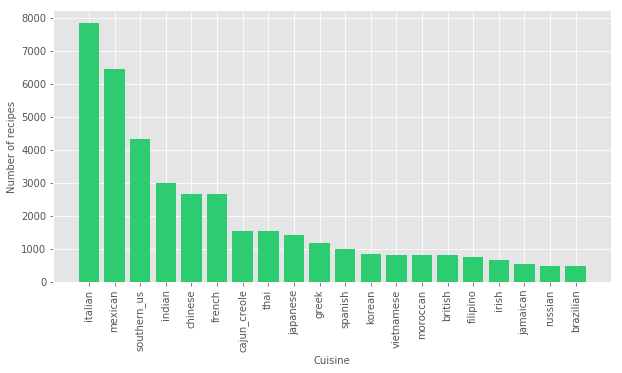

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
colors = ['#2ecc71'] * len(cuisine_counts)
plt.bar(range(len(cuisine_counts)), cuisine_counts.values(), align='center', color=colors)
plt.xlabel('Cuisine', fontsize=10)
plt.ylabel('Number of recipes', fontsize=10)
plt.xticks(range(len(cuisine_counts)), cuisine_counts.keys(), rotation='vertical')
plt.savefig("img/cuisines_histogram.eps", format='eps')
plt.show()

In the histogram graph we can see that the most common cuisine in the dataset is <font color='#2ecc71'><b>italian</b></font> (7838), <font color='#2ecc71'><b>mexican</b></font> (6438) and <font color='#2ecc71'><b>southern_us</b></font> (4320).

## Ingredients

We will look at the most common ingredients both overally and at the most common ingredients for each cuisine:

In [38]:
ingredients_counts = {}
ingr_text = ""

for recipe_ingr in df['ingredients']:
    for ingr in recipe_ingr:
        ingr_text += ingr
        ingr_text += " "
        count = ingredients_counts.get(ingr.lower(), 0)
        ingredients_counts[ingr.lower()] = count + 2
print(ingredients_counts)

{'romaine lettuce': 540, 'black olives': 458, 'grape tomatoes': 456, 'garlic': 14760, 'pepper': 8876, 'purple onion': 3792, 'seasoning': 274, 'garbanzo beans': 296, 'feta cheese crumbles': 716, 'plain flour': 308, 'ground pepper': 770, 'salt': 36098, 'tomatoes': 6116, 'ground black pepper': 9570, 'thyme': 722, 'eggs': 6776, 'green tomatoes': 216, 'yellow corn meal': 682, 'milk': 4526, 'vegetable oil': 8770, 'mayonaise': 1562, 'cooking oil': 966, 'green chilies': 1536, 'grilled chicken breasts': 10, 'garlic powder': 2884, 'yellow onion': 2368, 'soy sauce': 6592, 'butter': 9696, 'chicken livers': 130, 'water': 14914, 'wheat': 52, 'black pepper': 5254, 'shallots': 2954, 'cornflour': 206, 'cayenne pepper': 3046, 'onions': 15944, 'garlic paste': 564, 'lemon juice': 2790, 'chili powder': 4072, 'passata': 48, 'oil': 3940, 'ground cumin': 5494, 'boneless chicken skinless thigh': 686, 'garam masala': 1850, 'double cream': 80, 'natural yogurt': 36, 'bay leaf': 1678, 'sugar': 12868, 'fresh ginger

In [14]:
n_ingredients = len(ingredients_counts)
n_ingredients

6703

The total number of unique ingredients is <font color='#2ecc71'><b>6703</b></font>. For a better visualization we will genreate a word cloud image:

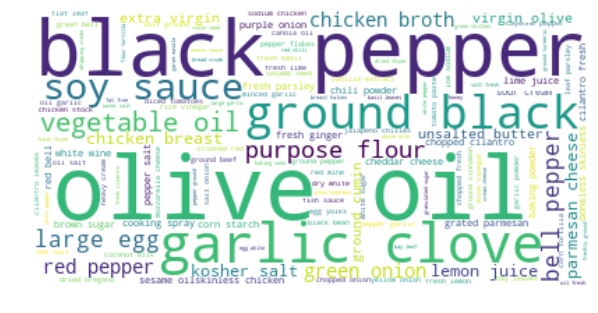

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="white").generate(ingr_text)

wordcloud.to_file("img/ingredients_word-cloud.png")
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

List and plot histogram of top ten ingredients:

In [42]:
top_10_ingredients = dict(sorted(ingredients_counts.items(), key=lambda tup: -tup[1])[0:10])
print(top_10_ingredients)

{'salt': 36098, 'onions': 15944, 'olive oil': 15944, 'water': 14914, 'garlic': 14760, 'sugar': 12868, 'garlic cloves': 12474, 'butter': 9696, 'ground black pepper': 9570, 'all-purpose flour': 9264}


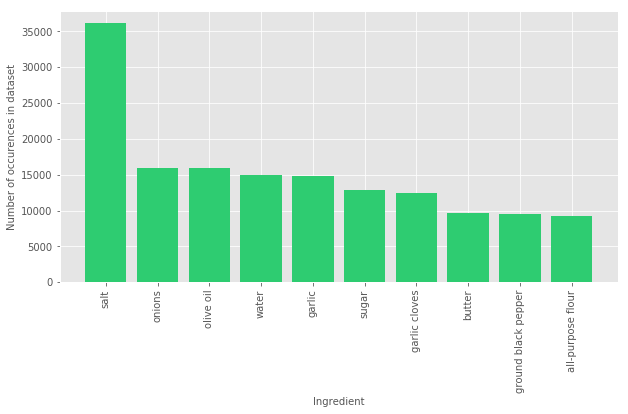

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
colors = ['#2ecc71'] * len(top_10_ingredients)
plt.bar(range(len(top_10_ingredients)), top_10_ingredients.values(), align='center', color=colors)
plt.xlabel('Ingredient', fontsize=10)
plt.ylabel('Number of occurences in dataset', fontsize=10)
plt.xticks(range(len(top_10_ingredients)), top_10_ingredients.keys(), rotation='vertical')
plt.savefig("img/top_10_ingredients_histogram.eps", format='eps')
plt.show()

We will create counters for each recipe of the same cuisine to see which ingredients are frequently used in that cuisine:

In [54]:
from collections import Counter

counters = {}
for cuis in cuisine_counts.keys():
    counters[cuis] = Counter()
    indices = (df['cuisine'] == cuis)
    for ingr in df[indices]['ingredients']:
        counters[cuis].update(ingr)

List 10 most common ingredients from each cuisine

In [55]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

Create a pandas data frame from top 10 ingredients for each cuisine

In [56]:
top_10 = []
for c in counters:
    top_10_c = counters[c].most_common(10)
    top_10.append(items[0] for items in top_10_c)
df_top_10 = pd.DataFrame(top_10, index=[c for c in counters],
            columns=range(1, 11))
df_top_10

,1,2,3,4,5,6,7,8,9,10
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water
thai,fish sauce,garlic,salt,coconut milk,vegetable oil,soy sauce,sugar,water,garlic cloves,fresh lime juice
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


We can see that salt, soy sauce a fish sauce are three ingredients that appear most frequently in every cusine. We are looking for ingredients which will carry a lot of unique information about the given cuisine.

On the other hand, below listed ingredients are used very sparsely in cuisines. Later in the data preprocessing we will remove ingredients with a low frequency of occurence.

In [57]:
lower_10 = []
for c in counters:
    lower_10_c = list(reversed(counters[c].most_common()))[0:10]
    lower_10.append(items[0] for items in lower_10_c)
df_lower_10 = pd.DataFrame(lower_10, index=[c for c in counters],
            columns=range(1, 11))
df_lower_10

,1,2,3,4,5,6,7,8,9,10
italian,tomato garlic pasta sauce,shrimp shells,pork meat,extra wide egg noodles,chipotle sauce,red,"rotini pasta, cook and drain",sponge,andouille chicken sausage,2% milk shredded mozzarella cheese
mexican,cheddar cheese soup,crushed cheese crackers,Manzanilla olives,black tea,ground sausage,Daiya,Oscar Mayer Deli Fresh Smoked Ham,game,whole wheat penne pasta,octopuses
southern_us,safflower,sea salt flakes,Lipton® Iced Tea Brew Family Size Tea Bags,Balsamico Bianco,cholesterol free egg substitute,orange glaze,citrus,italian sausage,bottled lime juice,grana padano
indian,toasted sesame oil,curry mix,kiwi,swordfish,dried Thai chili,fresh rosemary,celery root,orange slices,almond extract,celtic salt
chinese,lop chong,lamb chops,seasoning salt,flat leaf parsley,cola,instant white rice,creole seasoning,fresh thyme leaves,chuck,tempeh
french,meringue,unsalted shelled pistachio,light beer,dried beans,black bass,chocolate flavored liqueur,green lentil,whole wheat peasant bread,chocolate covered coffee beans,cooked turkey
cajun_creole,golden mushroom soup,vegetable bouillon,crisco,Oscar Mayer Cotto Salami,Oscar Mayer Deli Fresh Smoked Ham,Kraft Slim Cut Mozzarella Cheese Slices,KRAFT Zesty Italian Dressing,shredded pepper jack cheese,chicken parts,fresh chevre
thai,ciabatta loaf,cooking cream,apple juice concentrate,pork back ribs,crushed pineapple,nori flakes,linguini,pork spare ribs,riblets,kumquats
japanese,dried lentils,celery seed,tongue,cilantro stems,serrano peppers,teriyaki marinade,chinese black mushrooms,oloroso sherry,flowering chinese chives,snappers
greek,pomegranate,skinless chicken breasts,Hidden Valley® Greek Yogurt Original Ranch® Di...,sliced fresh fruit,dried porcini mushrooms,manouri,walnut halves,creamy peanut butter,whole peeled tomatoes,pizza crust


## Part 2: Data preprocessing

We will do some preprocessing steps to clean our data from redundant stop words, numbers and finally encode them into a form recognizable by our models. We will do the following steps:

- __Ingredient concatenation__ - ingredients are given in a list, which we will transform into a string
- __Normalizing Case__ - converting all words to lowercase
- __Punctation removal__ - removing any redundant symbols from the set '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
- __Digits__
- __Stemming__ - process of reducing words to their word stem, base or root form.
- __Rare words removal__ - words that appear less then 3 times will be removed from the ingredients, as their occurence does not provide enough prove to tell it discriminates one cuisine from another.

Let's start by loading train and test sets and creating a string for each recipe by concatenating its ingredients and then applying preprocessing on such data:

In [615]:
# ingredient concatenation
df['ingredient_strings'] = df['ingredients'].map(" ".join)
df['ingredient_strings'] = df['ingredient_strings'].apply(lambda x: x.split())
df_test['ingredient_strings'] = df_test['ingredients'].map(" ".join)
df_test['ingredient_strings'] = df_test['ingredient_strings'].apply(lambda x: x.split())

In [616]:
import nltk
import re
from nltk.stem import PorterStemmer
st = PorterStemmer()

def preprocess(text):
    # lowercasing
    text = text.lower()
    
    # punctation removal
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    
    # digits and trademark symbols removal
    text = re.sub(r"(\d)", "", text)
    text = re.sub(u'\w*\u2122', '', text)
    text = re.sub(u'\w*\u00ae', '', text)
        
    # stemming
    text = st.stem(text)
    
    return text

In [617]:
df['ingredient_strings'] = df['ingredient_strings'].apply(lambda i: list(map(lambda x: preprocess(x), i)))
df_test['ingredient_strings'] = df_test['ingredient_strings'].apply(lambda i: list(map(lambda x: preprocess(x), i)))

Now we will create a corpus consisting of the words from both training and testing data set to get a list of rare words:

In [618]:
all_ingredients = pd.concat([df['ingredient_strings'], df_test['ingredient_strings']])

ingredients_counts_all = {}

for recipe_ingr in all_ingredients:
    for ingr in recipe_ingr:
        count = ingredients_counts.get(ingr.lower(), 0)
        ingredients_counts_all[ingr.lower()] = count + 2

ingredients_counts_list_all = dict(ingredients_counts_all.items())
# get a list of words which appear 3 or less times in the train set
rare_words = [i for i in ingredients_counts_list_all if ingredients_counts_list_all[i] <= 3] 

In [619]:
print(rare_words[:100])

['poupon', 'krachai', 'nusalt', 'bluefish', 'rapini', 'rouget', 'shanghaistyl', 'moscato', 'dasti', 'hors', 'delux', 'silk', 'cupcak', 'surimi', 'dream', 'hint', 'potassium', 'hushpuppi', 'olivada', 'k', 'caciotta', 'octopu', 'alfredostyl', 'doughnut', 'fen', 'szu', 'shad', 'perfect', 'pinch', 'herbal', 'tomatoandbasil', 'chex', 'angelica', 'pastrami', 'arthur', 'multipurpos', 'malbec', 'chabli', 'kataifi', 'ridg', 'popsicl', 'nochicken', 'boiler', 'hershey', 'dreamfield', 'ataulfo', 'vienna', 'squirrel', 'yuba', 'laugh', 'cow', 'duncan', 'hine', 'zabaglion', 'tabbouleh', 'gammon', 'phoron', 'butterhead', 'chobani', 'yodel', 'gumdrop', 'paradis', 'chauric', 'pasteur', 'sambhar', 'del', 'mont', 'recaito', 'taglierini', 'chamomil', 'trang', 'domain', 'dublin', 'alouett', 'corncob', 'bramley', 'dogfish', 'opal', 'ronzoni', 'anardana', 'pinipig', 'farfallini', 'trenn', 'skinon', 'streusel', 'bunch', 'brain', 'ranchero', 'nen', 'dzem', 'cepe', 'bowl', 'cotechino', 'simpli', 'sevruga', 'tat'

Not frequent ingredients will be removed:

In [620]:
df['ingredient_strings'] = df['ingredient_strings'].apply(lambda x: [item for item in x if item not in rare_words and item is not None and item is not ""])
df_test['ingredient_strings'] = df_test['ingredient_strings'].apply(lambda x: [item for item in x if item not in rare_words_test and item is not None and item is not ""])

In [621]:
all_ingredients = pd.concat([df['ingredient_strings'], df_test['ingredient_strings']])
vocabulary_size = len(ingredients_counts_all)
print('Created corpus consist of ' + str(vocabulary_size) + ' unique ingredients.')

Created corpus consist of 2785 unique ingredients.


### Data encoding

### <font color='#2ecc71'><b>1. Features encoding</b></font>

Ingredients and cuisines in the form of string need to be encoded into a numerical representations. We need to represent each recipe with a matrix. The problem is, that recipes are not of a uniform length because the number of ingredients varies. Textual data are often represented by a <font color='#2ecc71'><b>Vector Space Model</b></font> with TF-IDF weight, which indicate the number of times each term appeared in the document (recipe in our case) multiplied by the logarithm of numbe of times the term appeared in any document. As each ingredient appeares in the recipe only once, we decided to go for a simplified version of Vector Space Model called Document Term Matrix with weights taking on values 0 or 1. 

Therefore, each recipe will be a vector of length equal to the number of unique ingredients. Vector has 1 at the position of ingredient which appears in the recipe and 0 otherwise.

In [622]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer

In [623]:
all_ingredients_text = all_ingredients.map(" ".join)
cv = CountVectorizer().fit(all_ingredients_text)

In [624]:
cv.vocabulary_.keys()

dict_keys(['romain', 'lettuc', 'black', 'oliv', 'grape', 'tomato', 'garlic', 'pepper', 'purpl', 'onion', 'season', 'garbanzo', 'bean', 'feta', 'chees', 'crumbl', 'plain', 'flour', 'ground', 'salt', 'thyme', 'egg', 'green', 'yellow', 'corn', 'meal', 'milk', 'veget', 'oil', 'mayonais', 'cook', 'chili', 'grill', 'chicken', 'breast', 'powder', 'soy', 'sauc', 'butter', 'liver', 'water', 'wheat', 'shallot', 'cornflour', 'cayenn', 'past', 'lemon', 'juic', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'doubl', 'cream', 'natur', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'bake', 'medium', 'shrimp', 'chop', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausag', 'pistachio', 'nut', 'almond', 'bark', 'dri', 'cranberri', 'pineappl', 'pork', 'poblano', 'tortilla', 'cheddar', 'iceberg', 'lime', 'basil', 'extravirgin', 'kosher', 'pimento', 'sweet', 'oregano', 'sharp', 'sw

In [625]:
# Fit on train and test sets:
df['ingredient_strings'] = df['ingredient_strings'].map(" ".join)
df_test['ingredient_strings'] = df_test['ingredient_strings'].map(" ".join)
X = cv.transform(df['ingredient_strings'])
X_test = cv.transform(df_test['ingredient_strings'])

In [626]:
X.shape

(39774, 2684)

We have 2684 unique ingredients, therefore each vector represeting a recipe will be of size 2684.

### <font color='#2ecc71'><b>2. Labels encoding</b></font>

We need to assign each cuisine a unique numerical identifier. We will use integer encoding for all our models except for the deep NN model, for which one-hot encoding will be used.

In [627]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [628]:
text_labels = list(df['cuisine'].values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(text_labels)

Convert labels to one hot encoding

In [629]:
onehot_encoder = OneHotEncoder(sparse=False)
y_1hot = y.reshape(len(y), 1)
y_1hot = onehot_encoder.fit_transform(y_1hot)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Labels with their corresponding string representations:

In [630]:
print(list(zip(y, label_encoder.classes_)))

[(6, 'brazilian'), (16, 'british'), (4, 'cajun_creole'), (7, 'chinese'), (7, 'filipino'), (10, 'french'), (17, 'greek'), (9, 'indian'), (13, 'irish'), (9, 'italian'), (9, 'jamaican'), (3, 'japanese'), (9, 'korean'), (13, 'mexican'), (9, 'moroccan'), (7, 'russian'), (1, 'southern_us'), (9, 'spanish'), (18, 'thai'), (19, 'vietnamese')]


## Splitting data

To be able to test the accuracy of our models, we will split the training data set into train and validation set with 80:20 ratio.

In [631]:
import numpy as np
from sklearn.model_selection import train_test_split

In [632]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

# Part 3: Choosing a predictive model

## 1. Logistic Regression

Now we will train a logistic regression on the training dataset:

In [633]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [634]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, np.ndarray.flatten(y_train))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [635]:
y_train_hat = logreg_model.predict(X_train)
y_val_hat = logreg_model.predict(X_val)

In [636]:
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_hat))
print("Validation Accuracy:", metrics.accuracy_score(y_val, y_val_hat))

Train Accuracy: 0.842044061724127
Validation Accuracy: 0.7859208045254557


## 2. Gaussian Bayes Classification

In [637]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB();
bayes_model.fit(X_train.toarray(), np.ndarray.flatten(y_train));

In [638]:
y_train_hat = bayes_model.predict(X_train.toarray())
y_val_hat = bayes_model.predict(X_val.toarray())

In [640]:
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_hat))
print("Test Accuracy:", metrics.accuracy_score(y_val, y_val_hat))

Train Accuracy: 0.30041798925170493
Test Accuracy: 0.2362036455059711


## 3. Random Forests Classifiers

In [641]:
from sklearn.ensemble import RandomForestClassifier

In [642]:
rf_model = RandomForestClassifier(n_estimators=100)

In [643]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [644]:
y_train_hat = rf_model.predict(X_train)
y_val_hat = rf_model.predict(X_val)

In [645]:
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_hat))
print("Test Accuracy:", metrics.accuracy_score(y_val, y_val_hat))

Train Accuracy: 0.9997485778937113
Test Accuracy: 0.7604022627278442


## 4. KNN Classifier

In [646]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [647]:
knn_model = KNeighborsClassifier(3) 
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [648]:
y_train_hat = knn_model.predict(X_train)
y_val_hat = knn_model.predict(X_val)

In [649]:
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_hat))
print("Validation Accuracy:", metrics.accuracy_score(y_val, y_val_hat))

Train Accuracy: 0.7890882805870706
Validation Accuracy: 0.6263984915147706


## 5. Deep Neural Network

We will use a one-hot representation for the labels, thus new train/test split is created:

In [650]:
X_train, X_val, y_train, y_val = train_test_split(X, y_1hot, test_size=0.2, random_state=123)

In [651]:
X_len = X_train.shape[1]
n_classes = len(y_train[0])

Create the model:

In [652]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1024, 
                    input_shape=[X_len],
                    activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=512,           
                    activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=256,        
                    activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=n_classes,           
                    activation=tf.nn.softmax))

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1024)              2749440   
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 1024)              4096      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)             

In [653]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [654]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
31819/31819 [==============================] - 11s 333us/sample - loss: 1.3902 - acc: 0.6106
Epoch 2/100
31819/31819 [==============================] - 10s 321us/sample - loss: 0.9308 - acc: 0.7270
Epoch 3/100
31819/31819 [==============================] - 11s 349us/sample - loss: 0.8051 - acc: 0.7628
Epoch 4/100
31819/31819 [==============================] - 11s 360us/sample - loss: 0.7220 - acc: 0.7850
Epoch 5/100
31819/31819 [==============================] - 10s 329us/sample - loss: 0.6569 - acc: 0.8045
Epoch 6/100
31819/31819 [==============================] - 10s 314us/sample - loss: 0.6164 - acc: 0.8132
Epoch 7/100
31819/31819 [==============================] - 10s 307us/sample - loss: 0.5715 - acc: 0.8273
Epoch 8/100
31819/31819 [==============================] - 12s 388us/sample - loss: 0.5232 - acc: 0.8412
Epoch 9/100
31819/31819 [==============================] - 11s 360us/sample - loss: 0.4987 - acc: 0.8473
Epoch 10/100
31819/31819 [=============================

31819/31819 [==============================] - 13s 396us/sample - loss: 0.1310 - acc: 0.9639
Epoch 78/100
31819/31819 [==============================] - 11s 359us/sample - loss: 0.1318 - acc: 0.9643
Epoch 79/100
31819/31819 [==============================] - 12s 387us/sample - loss: 0.1319 - acc: 0.9614
Epoch 80/100
31819/31819 [==============================] - 11s 336us/sample - loss: 0.1295 - acc: 0.9634
Epoch 81/100
31819/31819 [==============================] - 11s 343us/sample - loss: 0.1283 - acc: 0.9654
Epoch 82/100
31819/31819 [==============================] - 13s 412us/sample - loss: 0.1213 - acc: 0.9654
Epoch 83/100
31819/31819 [==============================] - 11s 333us/sample - loss: 0.1311 - acc: 0.9640
Epoch 84/100
31819/31819 [==============================] - 11s 351us/sample - loss: 0.1254 - acc: 0.9650
Epoch 85/100
31819/31819 [==============================] - 11s 353us/sample - loss: 0.1277 - acc: 0.9649
Epoch 86/100
31819/31819 [==============================] -

In [659]:
_, train_acc = model.evaluate(X_train, y_train)
_, val_acc = model.evaluate(X_val, y_val)

7955/7955 [==============================] - 1s 153us/sample - loss: 1.5215 - acc: 0.8030


In [660]:
predictions = model.predict_classes(X_val)

In [661]:
label_encoder.classes_[predictions]

array(['southern_us', 'southern_us', 'french', ..., 'indian', 'mexican',
       'southern_us'], dtype='<U12')

In [662]:
print("Train Accuracy:", round(train_acc * 100, 2))
print("Validation Accuracy:", round(val_acc * 100, 2))

Train Accuracy: 99.85
Validation Accuracy: 80.3


# Part 4: Creating submission file

In [663]:
X_test.shape

(9944, 2684)

In [664]:
predicted_ids = model.predict_classes(X_test)
predicted_cuisines = label_encoder.classes_[predicted_ids]

In [665]:
submission = pd.DataFrame({'id': df_test['id'], 'cuisine': predicted_cuisines})
submission[:100]

,id,cuisine
0,18009,irish
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
5,38527,southern_us
6,19666,italian
7,41217,chinese
8,28753,mexican
9,22659,british


Store results into .csv file

In [666]:
submission.to_csv('output/submission.csv', index=False)

## Conclusion